<a href="https://colab.research.google.com/github/ahmadbadawikr/DS_and_ML/blob/master/Clustering_Anime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
anime = pd.read_csv('/content/drive/My Drive/anime.csv')
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [5]:
print(anime.shape)

(12294, 7)


In [6]:
rate = pd.read_csv('/content/drive/My Drive/rating.csv')
rate

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [7]:
print(rate.shape)

(7813737, 3)


Mean Rating per User

In [9]:
MRPU = rate.groupby(['user_id']).mean().reset_index()
MRPU['mean_rating'] = MRPU['rating']

MRPU.drop(['anime_id','rating'],axis=1, inplace=True)

In [10]:
MRPU

,user_id,mean_rating
0,1,-0.712418
1,2,2.666667
2,3,7.382979
3,4,-1.000000
4,5,4.263383
...,...,...
73510,73512,7.846154
73511,73513,7.515152
73512,73514,10.000000
73513,73515,7.719388


In [11]:
rate =  pd.merge(rate,MRPU, on=['user_id','user_id'])

In [12]:
rate

,user_id,anime_id,rating,mean_rating
0,1,20,-1,-0.712418
1,1,24,-1,-0.712418
2,1,79,-1,-0.712418
3,1,226,-1,-0.712418
4,1,241,-1,-0.712418
...,...,...,...,...
7813732,73515,16512,7,7.719388
7813733,73515,17187,9,7.719388
7813734,73515,22145,10,7.719388
7813735,73516,790,9,9.000000


In [13]:
rate = rate.drop(rate[rate.rating < rate.mean_rating].index)

In [14]:
rate

,user_id,anime_id,rating,mean_rating
47,1,8074,10,-0.712418
81,1,11617,10,-0.712418
83,1,11757,10,-0.712418
101,1,15451,10,-0.712418
153,2,11771,10,2.666667
...,...,...,...,...
7813730,73515,13659,8,7.719388
7813733,73515,17187,9,7.719388
7813734,73515,22145,10,7.719388
7813735,73516,790,9,9.000000


In [15]:
rate[rate['user_id']==1]

,user_id,anime_id,rating,mean_rating
47,1,8074,10,-0.712418
81,1,11617,10,-0.712418
83,1,11757,10,-0.712418
101,1,15451,10,-0.712418


In [16]:
rate[rate['user_id']==2]

,user_id,anime_id,rating,mean_rating
153,2,11771,10,2.666667


In [17]:
rate['user_id'].unique()

array([    1,     2,     3, ..., 73514, 73515, 73516])

In [18]:
rate = rate.rename({'rating':'userRating'}, axis='columns')

In [19]:
rate

,user_id,anime_id,userRating,mean_rating
47,1,8074,10,-0.712418
81,1,11617,10,-0.712418
83,1,11757,10,-0.712418
101,1,15451,10,-0.712418
153,2,11771,10,2.666667
...,...,...,...,...
7813730,73515,13659,8,7.719388
7813733,73515,17187,9,7.719388
7813734,73515,22145,10,7.719388
7813735,73516,790,9,9.000000


Merge both table rating and anime

In [20]:
mergedata= pd.merge(anime,rate, on=['anime_id','anime_id'])
mergedata= mergedata[mergedata.user_id <= 20000]
mergedata

,anime_id,name,genre,type,episodes,rating,members,user_id,userRating,mean_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,7.699301
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,8.729242
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,7.372287
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10,8.356322
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398,10,-0.832298
...,...,...,...,...,...,...,...,...,...,...
4262448,3910,Kyuukyoku no Sex Adventure Kamasutra,"Action, Comedy, Hentai, Romance, Supernatural",OVA,1,5.08,835,15721,9,6.512000
4262455,4601,Fairy Forest Remi-chan,Hentai,OVA,1,5.04,1060,8446,-1,-1.000000
4262464,5545,Heisei Jogakuen Kagai Lesson,Hentai,OVA,1,5.00,503,11048,-1,-1.000000
4262494,2240,Sei Michaela Gakuen Hyouryuuki II,Hentai,OVA,2,4.80,457,17649,6,5.686567


In [21]:
len(mergedata['anime_id'].unique())

7852

In [22]:
len(anime['anime_id'].unique())

12294

creating crosstable

In [23]:
user_anime = pd.crosstab(mergedata['user_id'], mergedata['name'])
user_anime

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,.hack//Quantum,.hack//Quantum: Sore ike! Bokura no Chimuchimu-chan!!,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,.hack//Tasogare no Udewa Densetsu: Offline de Aimashou,.hack//The Movie: Sekai no Mukou ni,.hack//Unison,.hack//Versus: The Thanatos Report,009 Re:Cyborg,009-1,009-1: R&amp;B,00:08,07-Ghost,1+2=Paradise,100%,100-man-nen Chikyuu no Tabi: Bander Book,1000-nen Joou: Queen Millennia,1001 Nights,11-nin Iru!,11eyes,11eyes Picture Drama,11eyes: Momoiro Genmutan,12-sai.,12-sai. 2nd Season,12-sai.: Chicchana Mune no Tokimeki,15 Bishoujo Hyouryuuki,1989,20-dai no Heya-hen,2005-nen Uchuu no Tabi,...,Zoids,Zoids Fuzors,Zoids Genesis,Zoids Shinseiki/Zero,Zoku Koihime,Zoku Natsume Yuujinchou,Zoku Natsume Yuujinchou: 3D Nyanko-sensei Gekijou,Zoku Sayonara Zetsubou Sensei,Zombie-Loan,Zombie-Loan Specials,"Zone of the Enders: Dolores, I",Zone of the Enders: Idolo,Zonmi-chan: Halloween☆Special Movie!,Zonmi-chan: Meat Pie of the Dead,Zutto Mae kara Suki deshita.: Kokuhaku Jikkou Iinkai,_Summer,_Summer Specials,eX-Driver,eX-Driver the Movie,eX-Driver the Movie Specials,eX-Driver: Nina &amp; Rei Danger Zone,ef: A Tale of Melodies.,ef: A Tale of Melodies. - Prologue,ef: A Tale of Memories.,ef: A Tale of Memories. - Prologue,ef: A Tale of Memories. - Recollections,fake!fake!,gdgd Fairies,gdgd Fairies 2,gdgd Fairies Movie: tte Iu Eiga wa Dou kana...?,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
user_anime.shape

(20000, 7852)

Principal Component Analysis

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(user_anime)
pca_samples = pca.transform(user_anime)

In [26]:
ps = pd.DataFrame(pca_samples)
ps

,0,1,2
0,-1.579129,-0.500240,0.415767
1,-1.773553,-0.272593,0.116390
2,0.218814,-1.232282,-0.985772
3,0.199435,-0.291005,0.681065
4,3.532125,-0.184795,-0.743327
...,...,...,...
19995,-1.514955,-0.161690,0.339518
19996,-1.695818,-0.080439,0.237512
19997,-1.111682,0.007394,-0.278283
19998,2.193319,-0.976928,1.510620


In [27]:
tocluster = pd.DataFrame(ps[[0,1,2]])

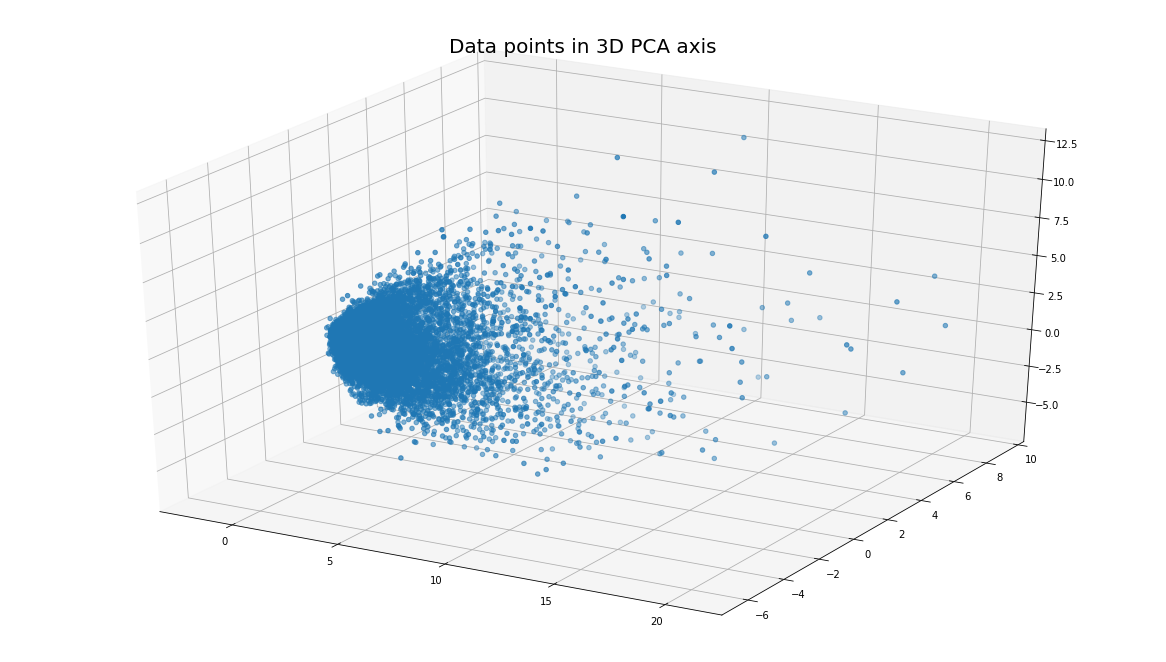

In [28]:
plt.rcParams['figure.figsize'] = (16,9)

fig = plt.figure()
ax=Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

Selecting num of k

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores=[]
inertia_list = np.empty(8)

for i in range(2,8):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(tocluster)
  inertia_list[i] = kmeans.inertia_
  scores.append(silhouette_score(tocluster, kmeans.labels_))

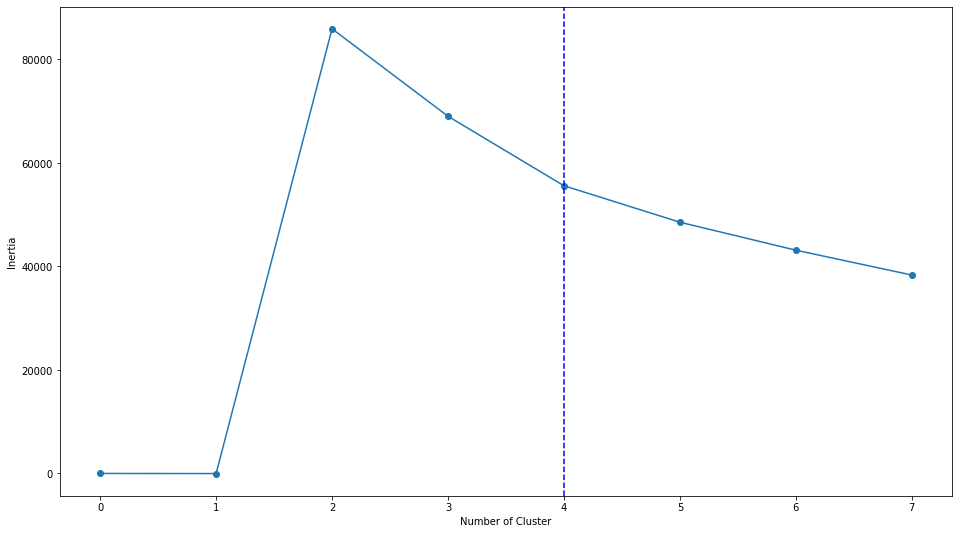

In [31]:
plt.plot(range(0,8), inertia_list,'-o')
plt.xlabel('Number of Cluster')
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Inertia')
plt.show()

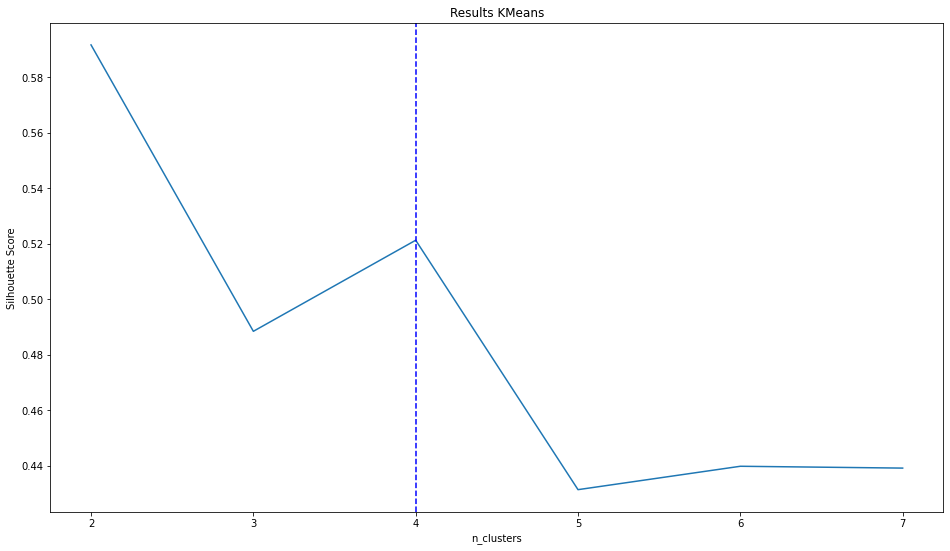

In [32]:
plt.plot(range(2,8),scores)
plt.title('Results KMeans')
plt.xlabel('n_clusters')
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Silhouette Score')
plt.show()

K Means Clustering

In [33]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=4, random_state=30).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)

print(centers)

[[ 1.90045273 -1.09606748 -0.44699808]
 [-1.09748002 -0.03718035  0.06961203]
 [ 7.42138078 -0.71317145  0.78750965]
 [ 1.67073597  2.32444766 -0.01593849]]


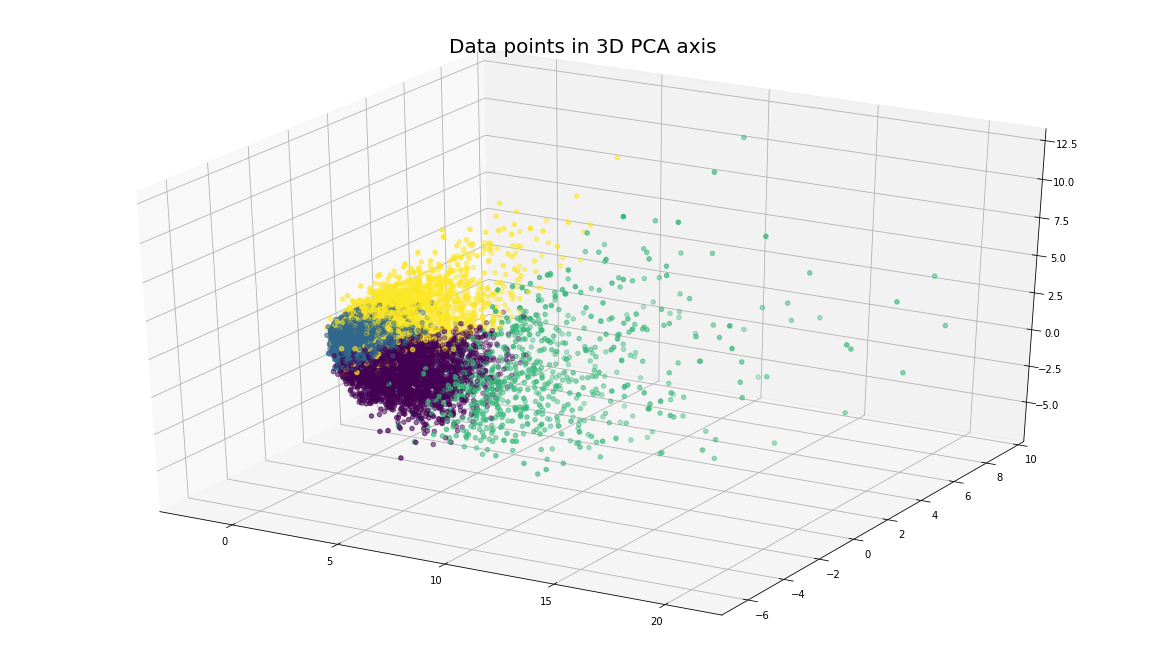

In [34]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1], c = c_preds)
plt.title('Data points in 3D PCA axis', fontsize=20)

plt.show()

Text(0, 0.5, 'y_values')

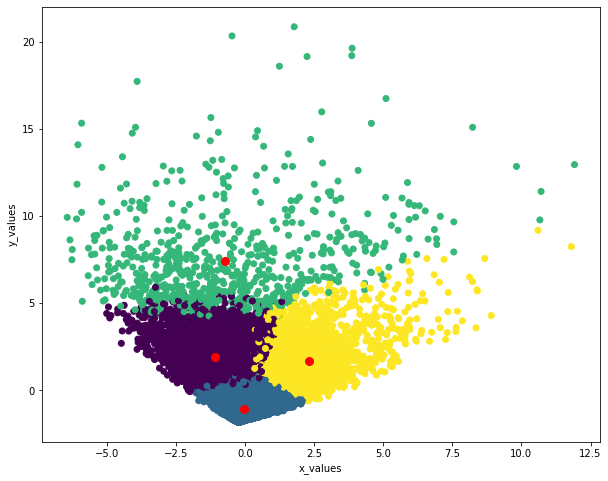

In [35]:
fig =  plt.figure(figsize=(10,8))
plt.scatter(tocluster[1], tocluster[0], c=c_preds)
for ci,c in enumerate(centers):
  plt.plot(c[1],c[0],'o', markersize=8, color='red', alpha=1)

plt.xlabel('x_values')
plt.ylabel('y_values')

In [36]:
user_anime['cluster'] = c_preds

user_anime

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,.hack//Quantum,.hack//Quantum: Sore ike! Bokura no Chimuchimu-chan!!,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,.hack//Tasogare no Udewa Densetsu: Offline de Aimashou,.hack//The Movie: Sekai no Mukou ni,.hack//Unison,.hack//Versus: The Thanatos Report,009 Re:Cyborg,009-1,009-1: R&amp;B,00:08,07-Ghost,1+2=Paradise,100%,100-man-nen Chikyuu no Tabi: Bander Book,1000-nen Joou: Queen Millennia,1001 Nights,11-nin Iru!,11eyes,11eyes Picture Drama,11eyes: Momoiro Genmutan,12-sai.,12-sai. 2nd Season,12-sai.: Chicchana Mune no Tokimeki,15 Bishoujo Hyouryuuki,1989,20-dai no Heya-hen,2005-nen Uchuu no Tabi,...,Zoids Fuzors,Zoids Genesis,Zoids Shinseiki/Zero,Zoku Koihime,Zoku Natsume Yuujinchou,Zoku Natsume Yuujinchou: 3D Nyanko-sensei Gekijou,Zoku Sayonara Zetsubou Sensei,Zombie-Loan,Zombie-Loan Specials,"Zone of the Enders: Dolores, I",Zone of the Enders: Idolo,Zonmi-chan: Halloween☆Special Movie!,Zonmi-chan: Meat Pie of the Dead,Zutto Mae kara Suki deshita.: Kokuhaku Jikkou Iinkai,_Summer,_Summer Specials,eX-Driver,eX-Driver the Movie,eX-Driver the Movie Specials,eX-Driver: Nina &amp; Rei Danger Zone,ef: A Tale of Melodies.,ef: A Tale of Melodies. - Prologue,ef: A Tale of Memories.,ef: A Tale of Memories. - Prologue,ef: A Tale of Memories. - Recollections,fake!fake!,gdgd Fairies,gdgd Fairies 2,gdgd Fairies Movie: tte Iu Eiga wa Dou kana...?,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,cluster
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
19997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
19998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [37]:
user_anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Columns: 7853 entries, &quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi to cluster
dtypes: int32(1), int64(7852)
memory usage: 1.2 GB


Each user characteristic

In [38]:
c0 = user_anime[user_anime['cluster']==0].drop('cluster',axis=1).mean()
c1 = user_anime[user_anime['cluster']==1].drop('cluster',axis=1).mean()
c2 = user_anime[user_anime['cluster']==2].drop('cluster',axis=1).mean()
c3 = user_anime[user_anime['cluster']==3].drop('cluster',axis=1).mean()

Cluster Zero

In [39]:
c0.sort_values(ascending=False)[0:15]

name
Shingeki no Kyojin                                          0.722766
No Game No Life                                             0.633719
Sword Art Online                                            0.607896
Death Note                                                  0.589789
Angel Beats!                                                0.589196
Steins;Gate                                                 0.545266
Fullmetal Alchemist: Brotherhood                            0.535767
Toradora!                                                   0.510240
Mirai Nikki (TV)                                            0.504898
Code Geass: Hangyaku no Lelouch                             0.501633
Code Geass: Hangyaku no Lelouch R2                          0.473731
One Punch Man                                               0.458890
Noragami                                                    0.457703
Tokyo Ghoul                                                 0.455031
Ano Hi Mita Hana no Namae wo 

In [40]:
def createAnimeInfoList(animelist):
  episode_list = list()
  genre_list = list()
  member_list = list()
  rating_list = list()
  for x in anime['name']:
    if x in animelist:
      episode_list.append(anime[anime['name']==x].episodes.values.astype(int))
      member_list.append(anime[anime['name']==x].members.values.astype(int))
      rating_list.append(anime[anime['name']==x].rating.values.astype(int))
      for y in anime[anime['name']==x].genre.values:
        genre_list.append(y)
  return genre_list, episode_list, rating_list, member_list

In [41]:
def count_word(df, ref_col, liste):
  keyword_count = dict()
  for s in liste: keyword_count[s] = 0
  for liste_keywords in df[ref_col].str.split(','):
    if type(liste_keywords) == float and pd.isnull(liste_keywords): continue

    for s in [s for s in liste_keywords if s in liste]:
      if pd.notnull(s): keyword_count[s] += 1
  
  keyword_occurences = []
  for k,v in keyword_count.items():
    keyword_occurences.append([k,v])
  keyword_occurences.sort(key=lambda x:x[1], reverse=True)
  return keyword_occurences, keyword_count

In [42]:
animelist = list(c0.index)
data = pd.DataFrame()
data['genre'],data['episode'],data['rating'],data['member'] = createAnimeInfoList(animelist)

In [43]:
set_keywords = set()
for liste_keywords in data['genre'].str.split(',').values:
  if isinstance(liste_keywords, float): continue
  set_keywords = set_keywords.union(liste_keywords)

In [44]:
from wordcloud import WordCloud

def makeCloud(Dict,name,color):
  words = dict()

  for s in Dict:
    words[s[0]] = s[1]

    wordcloud = WordCloud(width=1500, height=500, background_color=color, max_words=20, max_font_size=500, normalize_plurals=False)
    wordcloud.generate_from_frequencies(words)
  
  fig = plt.figure(figsize=(12,8))
  plt.title(name)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

Favorite genre of this cluster

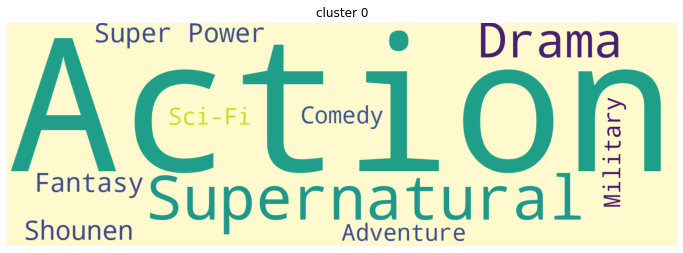

In [46]:
c0_animelist = list(c0.sort_values(ascending=False)[0:15].index)
c0_data = pd.DataFrame()
c0_data['genre'],c0_data['episode'],c0_data['rating'],c0_data['member']=createAnimeInfoList(c0_animelist)
c0_data.iloc[:,1:4] = c0_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c0_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10], 'cluster 0','lemonchiffon')

In [47]:
keyword_occurences

[['Action', 10],
 [' Supernatural', 8],
 [' Drama', 5],
 [' Super Power', 4],
 [' Fantasy', 4],
 [' Shounen', 4],
 [' Adventure', 3],
 [' Comedy', 3],
 [' Sci-Fi', 3],
 [' Military', 3],
 [' School', 3],
 [' Psychological', 3],
 [' Thriller', 3],
 [' Seinen', 2],
 [' Romance', 2],
 [' Game', 2],
 [' Mystery', 2],
 [' Mecha', 2],
 [' Slice of Life', 2],
 ['Adventure', 1],
 [' Horror', 1],
 ['Drama', 1],
 [' Ecchi', 1],
 ['Mystery', 1],
 [' Parody', 1],
 [' Magic', 1],
 ['Comedy', 1],
 [' Police', 1],
 ['Sci-Fi', 1],
 ['Ecchi', 0],
 ['Thriller', 0],
 [' Martial Arts', 0],
 ['Cars', 0],
 ['Shoujo', 0],
 ['Yaoi', 0],
 ['Magic', 0],
 [' Shounen Ai', 0],
 ['Horror', 0],
 [' Cars', 0],
 ['Psychological', 0],
 ['Police', 0],
 ['Military', 0],
 [' Shoujo Ai', 0],
 ['Martial Arts', 0],
 ['Music', 0],
 [' Music', 0],
 [' Historical', 0],
 [' Shoujo', 0],
 ['Kids', 0],
 ['Romance', 0],
 ['Mecha', 0],
 [' Vampire', 0],
 [' Sports', 0],
 [' Dementia', 0],
 ['Seinen', 0],
 ['Fantasy', 0],
 ['Dementia

In [48]:
print('cluster 0\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c0_data['episode'].mean(), c0_data['rating'].mean(),c0_data['member'].mean()))

cluster 0
AVG episode : 23.2
AVG movie rating : 8.066666666666666
AVG member : 687956.2


Cluster One

In [49]:
c1.sort_values(ascending=False)[0:15]

name
Death Note                            0.319365
Shingeki no Kyojin                    0.228056
Sword Art Online                      0.197115
Fullmetal Alchemist: Brotherhood      0.179877
Code Geass: Hangyaku no Lelouch       0.177786
Sen to Chihiro no Kamikakushi         0.159322
Angel Beats!                          0.155788
Fullmetal Alchemist                   0.155644
Code Geass: Hangyaku no Lelouch R2    0.152398
Naruto                                0.145330
Elfen Lied                            0.143671
Ouran Koukou Host Club                0.133646
Mirai Nikki (TV)                      0.119942
Toradora!                             0.116408
Howl no Ugoku Shiro                   0.114172
dtype: float64

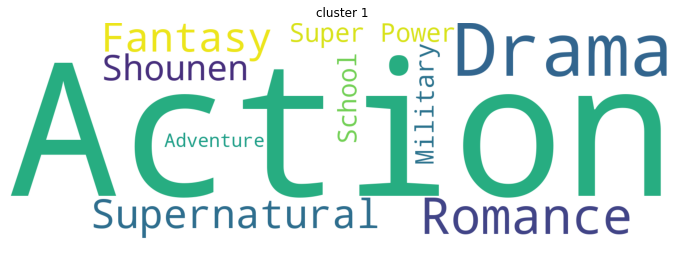

In [50]:
c1_animelist = list(c1.sort_values(ascending=False)[0:15].index)
c1_data = pd.DataFrame()
c1_data['genre'],c1_data['episode'],c1_data['rating'],c1_data['member'] =  createAnimeInfoList(c1_animelist)
c1_data.iloc[:,1:4] = c1_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c1_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 1","white")

In [51]:
keyword_occurences

[['Action', 10],
 [' Drama', 8],
 [' Romance', 5],
 [' Fantasy', 5],
 [' Supernatural', 5],
 [' Shounen', 5],
 [' Super Power', 4],
 [' Military', 4],
 [' School', 4],
 [' Adventure', 3],
 [' Comedy', 3],
 [' Psychological', 3],
 ['Adventure', 2],
 [' Sci-Fi', 2],
 [' Mecha', 2],
 [' Magic', 2],
 ['Comedy', 2],
 [' Thriller', 2],
 [' Martial Arts', 1],
 [' Seinen', 1],
 [' Horror', 1],
 [' Game', 1],
 [' Shoujo', 1],
 [' Mystery', 1],
 ['Mystery', 1],
 [' Harem', 1],
 [' Slice of Life', 1],
 [' Police', 1],
 ['Ecchi', 0],
 ['Thriller', 0],
 ['Cars', 0],
 ['Shoujo', 0],
 ['Yaoi', 0],
 ['Magic', 0],
 [' Shounen Ai', 0],
 ['Horror', 0],
 [' Cars', 0],
 ['Psychological', 0],
 ['Police', 0],
 ['Military', 0],
 [' Shoujo Ai', 0],
 ['Martial Arts', 0],
 ['Music', 0],
 [' Music', 0],
 [' Historical', 0],
 ['Kids', 0],
 ['Romance', 0],
 ['Mecha', 0],
 ['Drama', 0],
 [' Vampire', 0],
 [' Sports', 0],
 [' Dementia', 0],
 ['Seinen', 0],
 ['Fantasy', 0],
 ['Dementia', 0],
 [' Ecchi', 0],
 ['Sports'

In [52]:
print('cluster 1\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c1_data['episode'].mean(), c1_data['rating'].mean(),c1_data['member'].mean()))

cluster 1
AVG episode : 38.46666666666667
AVG movie rating : 7.866666666666666
AVG member : 668177.0666666667


Cluster Two

In [53]:
c2.sort_values(ascending=False)[0:15]

name
Angel Beats!                                           0.829670
No Game No Life                                        0.824176
Toradora!                                              0.809066
Steins;Gate                                            0.791209
Code Geass: Hangyaku no Lelouch                        0.789835
Shingeki no Kyojin                                     0.782967
Sword Art Online                                       0.766484
Code Geass: Hangyaku no Lelouch R2                     0.763736
Death Note                                             0.748626
Bakemonogatari                                         0.745879
Fullmetal Alchemist: Brotherhood                       0.732143
Hataraku Maou-sama!                                    0.726648
Mirai Nikki (TV)                                       0.723901
Yahari Ore no Seishun Love Comedy wa Machigatteiru.    0.717033
Clannad                                                0.712912
dtype: float64

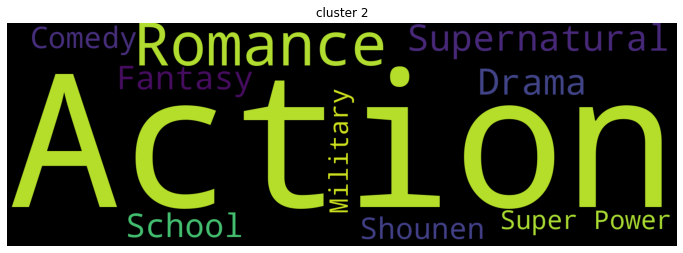

In [54]:
c2_animelist = list(c2.sort_values(ascending=False)[0:15].index)
c2_data = pd.DataFrame()
c2_data['genre'],c2_data['episode'],c2_data['rating'],c2_data['member'] =  createAnimeInfoList(c2_animelist)
c2_data.iloc[:,1:4] = c2_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c2_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 2","black")

In [55]:
keyword_occurences

[['Action', 7],
 [' Romance', 6],
 [' Supernatural', 6],
 [' Drama', 6],
 [' Fantasy', 5],
 [' School', 5],
 [' Shounen', 4],
 ['Comedy', 4],
 [' Super Power', 3],
 [' Military', 3],
 [' Thriller', 3],
 [' Adventure', 2],
 [' Game', 2],
 [' Comedy', 2],
 [' Sci-Fi', 2],
 [' Mecha', 2],
 ['Mystery', 2],
 [' Slice of Life', 2],
 [' Psychological', 2],
 ['Adventure', 1],
 [' Mystery', 1],
 [' Vampire', 1],
 [' Ecchi', 1],
 [' Magic', 1],
 [' Police', 1],
 ['Sci-Fi', 1],
 [' Demons', 1],
 ['Ecchi', 0],
 ['Thriller', 0],
 [' Martial Arts', 0],
 ['Cars', 0],
 [' Seinen', 0],
 ['Shoujo', 0],
 [' Horror', 0],
 ['Yaoi', 0],
 ['Magic', 0],
 [' Shounen Ai', 0],
 ['Horror', 0],
 [' Cars', 0],
 ['Psychological', 0],
 ['Police', 0],
 ['Military', 0],
 [' Shoujo Ai', 0],
 ['Martial Arts', 0],
 ['Music', 0],
 [' Music', 0],
 [' Historical', 0],
 [' Shoujo', 0],
 ['Kids', 0],
 ['Romance', 0],
 ['Mecha', 0],
 ['Drama', 0],
 [' Sports', 0],
 [' Dementia', 0],
 ['Seinen', 0],
 ['Fantasy', 0],
 ['Dementia'

In [56]:
c2_data['episode'].mean()

24.333333333333332

In [57]:
print('cluster 2\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c2_data['episode'].mean(), c2_data['rating'].mean(),c2_data['member'].mean()))

cluster 2
AVG episode : 24.333333333333332
AVG movie rating : 8.066666666666666
AVG member : 665432.4666666667


Cluster Three

In [58]:
c3.sort_values(ascending=False)[0:15]

name
Death Note                            0.679588
Code Geass: Hangyaku no Lelouch       0.668793
Code Geass: Hangyaku no Lelouch R2    0.609912
Fullmetal Alchemist                   0.601570
Sen to Chihiro no Kamikakushi         0.583906
Suzumiya Haruhi no Yuuutsu            0.551030
Neon Genesis Evangelion               0.538273
Tengen Toppa Gurren Lagann            0.530913
Cowboy Bebop                          0.526006
Fullmetal Alchemist: Brotherhood      0.508832
Mononoke Hime                         0.499509
Toradora!                             0.489696
Elfen Lied                            0.484298
Howl no Ugoku Shiro                   0.478901
Samurai Champloo                      0.477920
dtype: float64

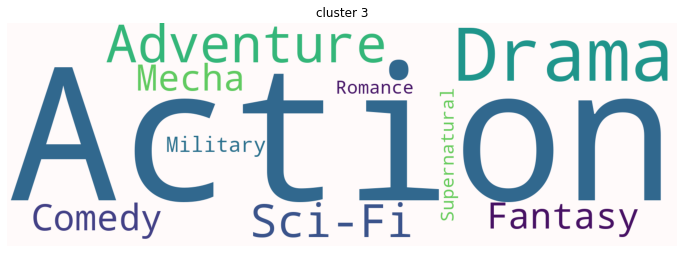

In [59]:
c3_animelist = list(c3.sort_values(ascending=False)[0:15].index)
c3_data = pd.DataFrame()
c3_data['genre'],c3_data['episode'],c3_data['rating'],c3_data['member'] =  createAnimeInfoList(c3_animelist)
c3_data.iloc[:,1:4] = c3_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c3_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 3","snow")

In [60]:
keyword_occurences

[['Action', 10],
 [' Drama', 8],
 [' Adventure', 6],
 [' Sci-Fi', 6],
 [' Fantasy', 4],
 [' Comedy', 4],
 [' Mecha', 4],
 [' Military', 4],
 [' Romance', 3],
 [' Supernatural', 3],
 [' Shounen', 3],
 [' School', 3],
 [' Psychological', 3],
 [' Super Power', 2],
 ['Adventure', 2],
 [' Slice of Life', 2],
 [' Magic', 2],
 ['Comedy', 2],
 [' Seinen', 1],
 [' Horror', 1],
 [' Historical', 1],
 [' Mystery', 1],
 [' Dementia', 1],
 ['Mystery', 1],
 [' Parody', 1],
 [' Space', 1],
 [' Police', 1],
 [' Samurai', 1],
 [' Thriller', 1],
 ['Ecchi', 0],
 ['Thriller', 0],
 [' Martial Arts', 0],
 ['Cars', 0],
 ['Shoujo', 0],
 ['Yaoi', 0],
 ['Magic', 0],
 [' Shounen Ai', 0],
 ['Horror', 0],
 [' Cars', 0],
 ['Psychological', 0],
 ['Police', 0],
 ['Military', 0],
 [' Game', 0],
 [' Shoujo Ai', 0],
 ['Martial Arts', 0],
 ['Music', 0],
 [' Music', 0],
 [' Shoujo', 0],
 ['Kids', 0],
 ['Romance', 0],
 ['Mecha', 0],
 ['Drama', 0],
 [' Vampire', 0],
 [' Sports', 0],
 ['Seinen', 0],
 ['Fantasy', 0],
 ['Dement

In [61]:
print('cluster 3\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c3_data['episode'].mean(), c3_data['rating'].mean(),c3_data['member'].mean()))

cluster 3
AVG episode : 24.133333333333333
AVG movie rating : 8.0
AVG member : 561513.7333333333
